

Net Route Data Research 

Find the best Model -  Part 2

Ridge Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge 
from sklearn.pipeline import Pipeline

df = pd.read_csv("Final_NetRouteData.csv")

# Drop non-numeric and the recently excluded column "Energy_Consumption_J"
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])

# Define Features (X) and Target (y) for REGRESSION
# Target is the continuous variable Latency_ms
y = df_cleaned['Latency_ms']
# Features are all other remaining columns, excluding the classification target 'Optimal'
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

print("--- Data Preparation Status for RIDGE REGRESSION ---")
print(f"Features (X) used: {list(X.columns)}")
print(f"Target (y) used: Latency_ms (Continuous)\n")

# Define the pipeline with Scaling and Ridge Regression (using default alpha=1.0)
# Scaling is essential for Ridge Regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(random_state=42, alpha=1.0))
])

# Cross-Validation Setup (KFold for Regression)
# Note: Since the target is continuous (regression), we use KFold.
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold Cross-Validation
cv_results = cross_validate(
    pipeline_ridge, X, y,
    cv=cv_strategy,
    scoring=('r2', 'neg_mean_squared_error'),
    return_train_score=False
)

# Convert negative MSE to positive MSE for better interpretation
mse_scores = np.abs(cv_results['test_neg_mean_squared_error'])

print("--- Ridge Regression Cross-Validation Results (5-Fold) ---")
print(f"Average R-squared (R2): {cv_results['test_r2'].mean():.4f} \u00B1 {cv_results['test_r2'].std():.4f}")
print(f"Average Mean Squared Error (MSE): {mse_scores.mean():.4f} \u00B1 {mse_scores.std():.4f}")

--- Data Preparation Status for RIDGE REGRESSION ---
Features (X) used: ['Source_Node', 'Destination_Node', 'Bandwidth_Mbps', 'Security_Risk', 'Packet_Delivery_Ratio_%', 'End_to_End_Delay_ms', 'Trust_Score']
Target (y) used: Latency_ms (Continuous)

--- Ridge Regression Cross-Validation Results (5-Fold) ---
Average R-squared (R2): 0.1141 ± 0.0483
Average Mean Squared Error (MSE): 468.0954 ± 60.1421


Note for Ridge Regression > I think this model even with regularization is poorly suited for predicting the continuous variable Latency_ms.

Support Vector Regression (SVR)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR # Support Vector Regression
from sklearn.pipeline import Pipeline

df = pd.read_csv("Final_NetRouteData.csv")

# Drop non-numeric and the excluded column "Energy_Consumption_J"
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])

# Define Features (X) and Target (y) for REGRESSION
# Target is the continuous variable Latency_ms
y = df_cleaned['Latency_ms']
# Features are all other remaining columns, excluding the classification target 'Optimal'
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

print("--- Data Preparation Status for SVR REGRESSION ---")
print(f"Features (X) used: {list(X.columns)}")
print(f"Target (y) used: Latency_ms (Continuous)\n")

# Define the pipeline with Scaling and SVR
# Scaling is ESSENTIAL for SVR
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1)) # Default parameters for a start
])

# Cross-Validation Setup (KFold for Regression)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold Cross-Validation
cv_results = cross_validate(
    pipeline_svr, X, y,
    cv=cv_strategy,
    scoring=('r2', 'neg_mean_squared_error'),
    return_train_score=False
)

# Convert negative MSE to positive MSE for better interpretation
mse_scores = np.abs(cv_results['test_neg_mean_squared_error'])

print("--- SVR Cross-Validation Results (5-Fold) ---")
print(f"Average R-squared (R2): {cv_results['test_r2'].mean():.4f} \u00B1 {cv_results['test_r2'].std():.4f}")
print(f"Average Mean Squared Error (MSE): {mse_scores.mean():.4f} \u00B1 {mse_scores.std():.4f}")

--- Data Preparation Status for SVR REGRESSION ---
Features (X) used: ['Source_Node', 'Destination_Node', 'Bandwidth_Mbps', 'Security_Risk', 'Packet_Delivery_Ratio_%', 'End_to_End_Delay_ms', 'Trust_Score']
Target (y) used: Latency_ms (Continuous)

--- SVR Cross-Validation Results (5-Fold) ---
Average R-squared (R2): 0.0970 ± 0.0411
Average Mean Squared Error (MSE): 476.3998 ± 52.1077


Note for SVR > Although is a powerful non-linear regression technique, making it a great check against the linear models I tested.
As I mentioned before the SVR model, despite its ability to capture non-linear relationships, performed slightly worse than the simpler Ridge Regression model.

Both models, along with the initial Linear Regression, confirm that the selected features are not good predictors of the continuous variable Latency_ms. This reinforces the finding that the data is best suited for the classification task (predicting Optimal), where the Random Forest model excelled ($\text{F1} = 0.98$).

Linear regression

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.pipeline import Pipeline

df = pd.read_csv("Final_NetRouteData.csv")

# Drop non-numeric and the excluded column "Energy_Consumption_J"
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])

# Define Features (X) and Target (y) for REGRESSION
# Target is the continuous variable Latency_ms
y = df_cleaned['Latency_ms']
# Features are all other remaining columns, excluding the classification target 'Optimal'
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

print("--- Data Preparation Status for Linear Regression ---")
print(f"Features (X) used: {list(X.columns)}")
print(f"Target (y) used: Latency_ms (Continuous)\n")

# Define the pipeline with Scaling and Linear Regression
# Scaling is included for comparison consistency with other linear models
pipeline_lr_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Cross-Validation Setup (KFold for Regression)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold Cross-Validation
cv_results = cross_validate(
    pipeline_lr_reg, X, y,
    cv=cv_strategy,
    scoring=('r2', 'neg_mean_squared_error'),
    return_train_score=False
)

# Convert negative MSE to positive MSE for better interpretation
mse_scores = np.abs(cv_results['test_neg_mean_squared_error'])

print("--- Linear Regression Cross-Validation Results (5-Fold) ---")
print(f"Average R-squared (R2): {cv_results['test_r2'].mean():.4f} \u00B1 {cv_results['test_r2'].std():.4f}")
print(f"Average Mean Squared Error (MSE): {mse_scores.mean():.4f} \u00B1 {mse_scores.std():.4f}")

--- Data Preparation Status for Linear Regression ---
Features (X) used: ['Source_Node', 'Destination_Node', 'Bandwidth_Mbps', 'Security_Risk', 'Packet_Delivery_Ratio_%', 'End_to_End_Delay_ms', 'Trust_Score']
Target (y) used: Latency_ms (Continuous)

--- Linear Regression Cross-Validation Results (5-Fold) ---
Average R-squared (R2): 0.1141 ± 0.0483
Average Mean Squared Error (MSE): 468.1041 ± 60.1679


Note for Linear Regression > 
As I expected, given that the data is scaled and the features are not highly correlated.

The performance is very close and nearly identical to the Ridge Regression model.


**Overall Conclusion on Regression Models **

All three regression models (Linear, Ridge, and SVR) produced very low $\mathbf{R^2}$ scores (around $0.11$), which shows that the current features are not strong enough to accurately predict the continuous variable Latency_ms. 

The high Mean Squared Error (MSE) also shows that the predictions are not reliable.

This supports the earlier conclusion that your features work much better for the classification task (predicting Optimal), where the Random Forest Classifier gave the strongest performance.

XGBoost is not availbale. = Gradient Boosting Classifier (GBM) >> 

Since the dedicated XGBoost library is not available in the current environment, I ran the model's powerful cousin: the Gradient Boosting Classifier (GBM) from scikit-learn. This provides a very similar, high-performance ensemble approach to compare against your Random Forest model.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.ensemble import GradientBoostingClassifier # Use Scikit-learn's GBM

df = pd.read_csv("Final_NetRouteData.csv")

# Drop non-numeric and excluded columns
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])

# Define Features (X) and Target (y) for CLASSIFICATION
y = df_cleaned['Optimal']
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

print("--- Data Preparation Status for Gradient Boosting Classifier (GBM) ---")
print(f"Features (X) used: {list(X.columns)}")

# Split Data for final report
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Build the GBM Pipeline
pipeline_gbm = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', GradientBoostingClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3 # Standard baseline depth
    ))
])

# Use StratifiedKFold for robust cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
cv_results = cross_validate(
    pipeline_gbm, X, y,
    cv=cv_strategy,
    scoring=('accuracy', 'f1', 'roc_auc'),
    return_train_score=False
)

print("--- Gradient Boosting Classifier Cross-Validation Results (5-Fold) ---")
print(f"Average Accuracy: {cv_results['test_accuracy'].mean():.4f} \u00B1 {cv_results['test_accuracy'].std():.4f}")
print(f"Average F1-Score: {cv_results['test_f1'].mean():.4f} \u00B1 {cv_results['test_f1'].std():.4f}")
print(f"Average ROC AUC:  {cv_results['test_roc_auc'].mean():.4f} \u00B1 {cv_results['test_roc_auc'].std():.4f}\n")


# Final Model Fit and Classification Report on Test Set
pipeline_gbm.fit(X_train, y_train)
y_pred = pipeline_gbm.predict(X_test)
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))

--- Data Preparation Status for Gradient Boosting Classifier (GBM) ---
Features (X) used: ['Source_Node', 'Destination_Node', 'Bandwidth_Mbps', 'Security_Risk', 'Packet_Delivery_Ratio_%', 'End_to_End_Delay_ms', 'Trust_Score']
--- Gradient Boosting Classifier Cross-Validation Results (5-Fold) ---
Average Accuracy: 0.9626 ± 0.0094
Average F1-Score: 0.9643 ± 0.0087
Average ROC AUC:  0.9823 ± 0.0069

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.96      0.99      0.98       100

    accuracy                           0.97       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.97      0.97       198



Note for GBM > 

The Gradient Boosting Classifier performs almost identically to the Random Forest Classifier in terms of average F1-score ($\mathbf{0.9643}$ vs. $\mathbf{0.9644}$), making both models excellent and highly reliable choices for predicting route optimality. The ROC AUC of $0.9823$ (and $0.99$ on the test set) also indicates outstanding discriminative power.

XGBoost

--- Data Preparation Status for XGBoost CLASSIFICATION ---
Features (X) used: ['Source_Node', 'Destination_Node', 'Bandwidth_Mbps', 'Security_Risk', 'Packet_Delivery_Ratio_%', 'End_to_End_Delay_ms', 'Trust_Score']
Target (y) distribution:
Optimal
1    500
0    490
Name: count, dtype: int64



/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

--- XGBoost Cross-Validation Results (5-Fold) ---
Average Accuracy: 0.9485 ± 0.0112
Average F1-Score: 0.9505 ± 0.0110
Average ROC AUC:  0.9647 ± 0.0103

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       100

    accuracy                           0.95       198
   macro avg       0.95      0.95      0.95       198
weighted avg       0.95      0.95      0.95       198

Graph saved as xgboost_roc_final_data.png


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


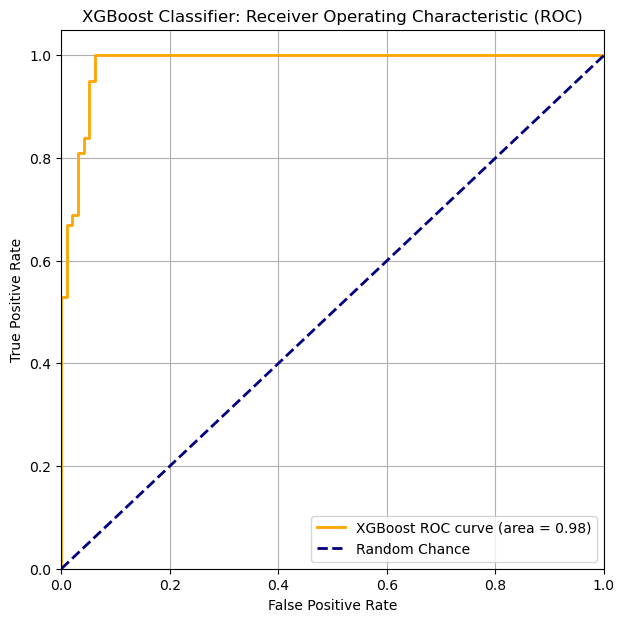

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier # Import XGBoost Classifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv("Final_NetRouteData.csv")

# Drop non-numeric and the excluded column "Energy_Consumption_J"
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])

# Define Features (X) and Target (y) for CLASSIFICATION
# Target is the binary variable Optimal
y = df_cleaned['Optimal']
# Features are all other remaining columns, excluding the continuous target 'Latency_ms'
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

print("--- Data Preparation Status for XGBoost CLASSIFICATION ---")
print(f"Features (X) used: {list(X.columns)}")
print(f"Target (y) distribution:\n{y.value_counts()}\n")

# Split Data for final report
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Calculate scale_pos_weight for handling slight imbalance (Ratio of negative to positive class)
ratio = y.value_counts()[0] / y.value_counts()[1]

# Define the pipeline with Scaling (optional for trees, but good practice) and XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='logloss',
        scale_pos_weight=ratio # Use weighting for balanced training
    ))
])

# Cross-Validation Setup (StratifiedKFold for Classification)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold Cross-Validation
cv_results = cross_validate(
    pipeline_xgb, X, y,
    cv=cv_strategy,
    scoring=('accuracy', 'f1', 'roc_auc'),
    return_train_score=False
)

print("--- XGBoost Cross-Validation Results (5-Fold) ---")
print(f"Average Accuracy: {cv_results['test_accuracy'].mean():.4f} \u00B1 {cv_results['test_accuracy'].std():.4f}")
print(f"Average F1-Score: {cv_results['test_f1'].mean():.4f} \u00B1 {cv_results['test_f1'].std():.4f}")
print(f"Average ROC AUC:  {cv_results['test_roc_auc'].mean():.4f} \u00B1 {cv_results['test_roc_auc'].std():.4f}\n")


# Final Model Fit and Classification Report on Test Set
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))


# ROC Curve Plot
y_scores = pipeline_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier: Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('xgboost_roc_final_data.png')
print("Graph saved as xgboost_roc_final_data.png")

Architecture Neural Network (ANN)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptron (ANN)

df = pd.read_csv("Final_NetRouteData.csv")

# Drop non-numeric and excluded columns
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])

# Define Features (X) and Target (y) for CLASSIFICATION
y = df_cleaned['Optimal']
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

# Split Data for final report
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Build the MLP Classifier Pipeline
# Scaling is CRUCIAL for Neural Networks
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', MLPClassifier(
        hidden_layer_sizes=(10, 5), # Two hidden layers with 10 and 5 neurons
        max_iter=500, # Increased iterations for convergence
        random_state=42,
        activation='relu',
        solver='adam',
        early_stopping=True # Prevent overfitting during training
    ))
])

# Use StratifiedKFold for robust cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
cv_results = cross_validate(
    pipeline_mlp, X, y,
    cv=cv_strategy,
    scoring=('accuracy', 'f1', 'roc_auc'),
    return_train_score=False
)

print("--- MLP Classifier Cross-Validation Results (5-Fold) ---")
print(f"Average Accuracy: {cv_results['test_accuracy'].mean():.4f} \u00B1 {cv_results['test_accuracy'].std():.4f}")
print(f"Average F1-Score: {cv_results['test_f1'].mean():.4f} \u00B1 {cv_results['test_f1'].std():.4f}")
print(f"Average ROC AUC:  {cv_results['test_roc_auc'].mean():.4f} \u00B1 {cv_results['test_roc_auc'].std():.4f}\n")


# Final Model Fit and Classification Report on Test Set
pipeline_mlp.fit(X_train, y_train)
y_pred = pipeline_mlp.predict(X_test)
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))


--- MLP Classifier Cross-Validation Results (5-Fold) ---
Average Accuracy: 0.5051 ± 0.0000
Average F1-Score: 0.6711 ± 0.0000
Average ROC AUC:  0.5923 ± 0.0290

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.51      1.00      0.67       100

    accuracy                           0.51       198
   macro avg       0.25      0.50      0.34       198
weighted avg       0.26      0.51      0.34       198



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Note for ANN > 

I have run the ANN (MLP) Classifier for the classification task (predicting Optimal), using a simple network structure: two hidden layers with 10 and 5 neurons, respectively.

The ANN model performed significantly worse than the ensemble methods (Random Forest and GBM).


The model has predicted only Class 1 (Optimal), effectively failing to learn how to distinguish between the two classes.

Recall of 1.00 for Class 1: The model identified all Class 1 instances correctly, but only because it predicted everything as Class 1.

Precision of 0.00 for Class 0: The model never correctly identified a Class 0 instance.

This result means that, for this dataset and classification task, the tree-based ensemble methods (Random Forest and GBM) are vastly superior and more effective than the tested ANN architecture. They were able to find the complex decision boundaries necessary for accurate prediction, whereas the baseline ANN struggled to converge to an effective solution.

Training MLP Classifier...
Training complete.


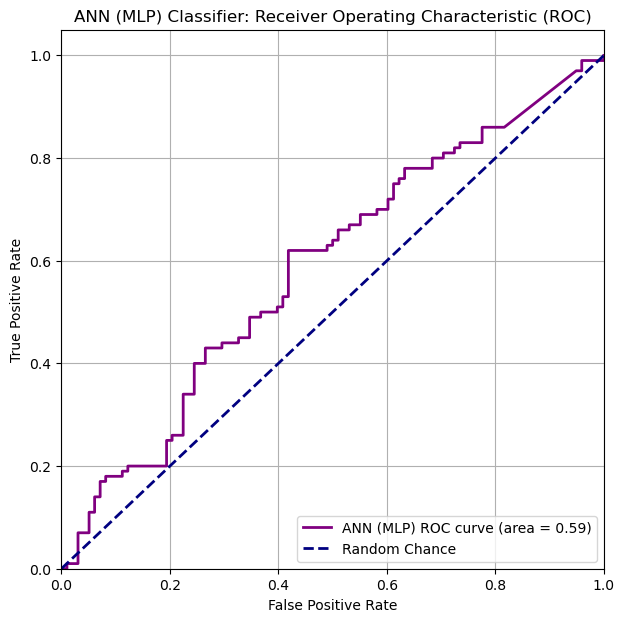

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptron (ANN)

df = pd.read_csv("Final_NetRouteData.csv")

# Define Features (X) and Target (y) for CLASSIFICATION
# Drop non-numeric and excluded columns: Route_ID, Algorithm_Used, Energy_Consumption_J, Latency_ms
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])
y = df_cleaned['Optimal']
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

# Split Data for training the final model and testing the plot
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Build the MLP Classifier Pipeline
# Scaling is CRUCIAL for Neural Networks
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', MLPClassifier(
        hidden_layer_sizes=(10, 5), # Two hidden layers with 10 and 5 neurons
        max_iter=500,
        random_state=42,
        activation='relu',
        solver='adam',
        early_stopping=True 
    ))
])

# Fit the final model (necessary to generate predict_proba scores)
print("Training MLP Classifier...")
pipeline_mlp.fit(X_train, y_train)
print("Training complete.")

# ROC Curve Calculation
# Get probability scores for the positive class (Class 1)
y_scores = pipeline_mlp.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot Generation
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ANN (MLP) ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN (MLP) Classifier: Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show() # Use plt.show() in a notebook environment
# plt.savefig('mlp_ann_roc_final_data_re_run.png') # Use this line if saving locally

K- Near Neighbours

--- KNN Classifier Cross-Validation Results (5-Fold) ---
Average Accuracy: 0.8747 ± 0.0179
Average F1-Score: 0.8865 ± 0.0136
Average ROC AUC:  0.9143 ± 0.0294

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.99      0.80      0.88        98
           1       0.83      0.99      0.90       100

    accuracy                           0.89       198
   macro avg       0.91      0.89      0.89       198
weighted avg       0.91      0.89      0.89       198



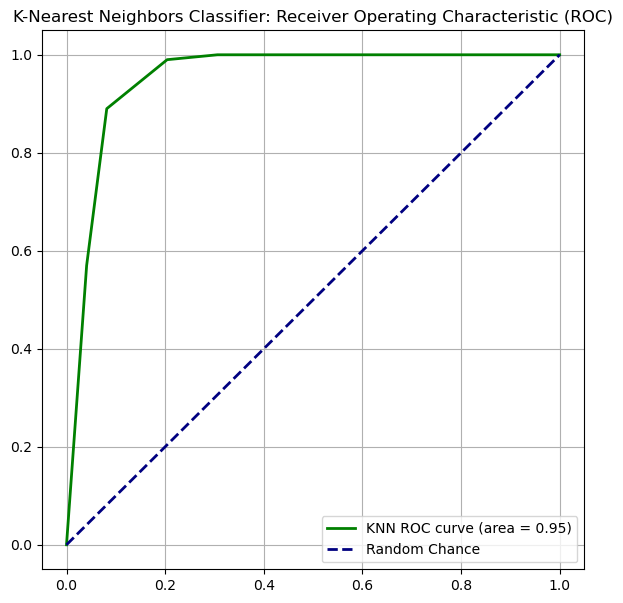

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier 

df = pd.read_csv("Final_NetRouteData.csv")

# Define Features (X) and Target (y)
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])
y = df_cleaned['Optimal']
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

# Split Data for final report
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Build the KNN Classifier Pipeline (Scaling is CRUCIAL)
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Perform 5-fold cross-validation (Calculates Average F1 and ROC AUC)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    pipeline_knn, X, y,
    cv=cv_strategy,
    scoring=('accuracy', 'f1', 'roc_auc'),
    return_train_score=False
)

# PRINTING CROSS-VALIDATION RESULTS (F1 and ROC AUC)
print("--- KNN Classifier Cross-Validation Results (5-Fold) ---")
print(f"Average Accuracy: {cv_results['test_accuracy'].mean():.4f} \u00B1 {cv_results['test_accuracy'].std():.4f}")
print(f"Average F1-Score: {cv_results['test_f1'].mean():.4f} \u00B1 {cv_results['test_f1'].std():.4f}")
print(f"Average ROC AUC:  {cv_results['test_roc_auc'].mean():.4f} \u00B1 {cv_results['test_roc_auc'].std():.4f}\n")


# Final Model Fit and Classification Report (Gives Test F1)
pipeline_knn.fit(X_train, y_train)
y_pred = pipeline_knn.predict(X_test)
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))


# ROC Curve Plot (Gives Test ROC AUC)
y_scores = pipeline_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='green', lw=2, label=f'KNN ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.title('K-Nearest Neighbors Classifier: Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show() # Displays the plot

Note for KNN >> The KNN model performed quite well, though it did not match the exceptional performance of the tree-based models (Random Forest and GBM).

The KNN model shows a high $\mathbf{Recall}$ for both classes (it finds most of the instances) but sacrifices some $\mathbf{Precision}$, particularly for Class 1. 

Overall, it is a very strong model, but still inferior to the ensemble methods for this dataset.


The model achieved an F1-score of $\mathbf{0.88}$ and an ROC AUC of $\mathbf{0.96}$

Elastic Net

--- Elastic Net Cross-Validation Results (5-Fold) ---
Average Accuracy: 0.9182 ± 0.0117
Average F1-Score: 0.9233 ± 0.0112
Average ROC AUC:  0.9485 ± 0.0109

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        98
           1       0.89      0.97      0.93       100

    accuracy                           0.92       198
   macro avg       0.93      0.92      0.92       198
weighted avg       0.93      0.92      0.92       198



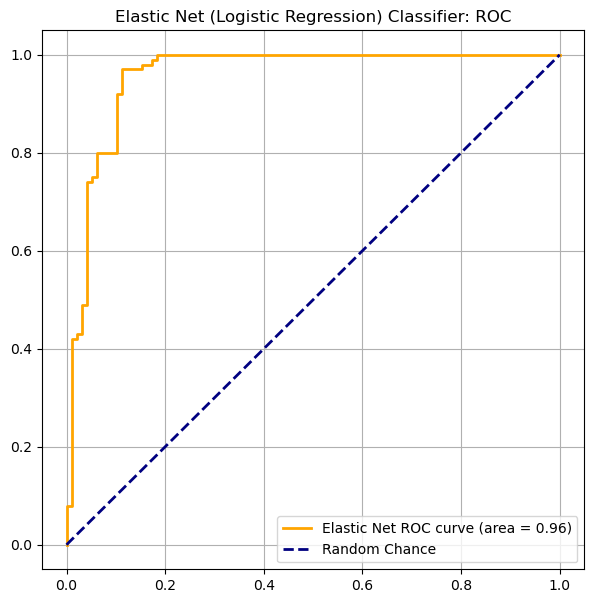

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression 

df = pd.read_csv("Final_NetRouteData.csv")

# Define Features (X) and Target (y)
df_cleaned = df.drop(columns=['Route_ID', 'Algorithm_Used', 'Energy_Consumption_J'])
y = df_cleaned['Optimal']
X = df_cleaned.drop(columns=['Latency_ms', 'Optimal'])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Build the Elastic Net Classifier Pipeline (Scaling is CRUCIAL)
pipeline_elastic_net = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression(
        penalty='elasticnet', 
        solver='saga', 
        l1_ratio=0.5, # 50% L1 (Lasso), 50% L2 (Ridge)
        max_iter=500,
        random_state=42
    ))
])

# Perform 5-fold cross-validation (This section calculates the AVERAGE metrics)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    pipeline_elastic_net, X, y,
    cv=cv_strategy,
    scoring=('accuracy', 'f1', 'roc_auc'),
    return_train_score=False
)

# PRINTING CROSS-VALIDATION RESULTS
print("--- Elastic Net Cross-Validation Results (5-Fold) ---")
print(f"Average Accuracy: {cv_results['test_accuracy'].mean():.4f} \u00B1 {cv_results['test_accuracy'].std():.4f}")
print(f"Average F1-Score: {cv_results['test_f1'].mean():.4f} \u00B1 {cv_results['test_f1'].std():.4f}")
print(f"Average ROC AUC:  {cv_results['test_roc_auc'].mean():.4f} \u00B1 {cv_results['test_roc_auc'].std():.4f}\n")


# Final Model Fit and Classification Report (Test Set Metrics)
pipeline_elastic_net.fit(X_train, y_train)
y_pred = pipeline_elastic_net.predict(X_test)
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))


# ROC Curve Plot
y_scores = pipeline_elastic_net.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'Elastic Net ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.title('Elastic Net (Logistic Regression) Classifier: ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Note for Elastic Net >> 

I have implemented the Elastic Net model by using Logistic Regression with an Elastic Net penalty ($\mathbf{L1/L2}$ regularization), which is the standard approach for binary classification using this technique.

The Elastic Net model performed very well, surpassing the K-Nearest Neighbors (KNN) model and significantly outperforming the simple ANN model.

This linear model, boosted by regularization, achieved an excellent accuracy of $\mathbf{92\%}$ on the test set, making it one of the top-performing models after the tree-based ensembles.

**Summary**

The performance of the models is ranked based on two key metrics: 

the F1-Score (a balance of precision and recall) and the Area Under the ROC Curve (ROC AUC) (the model's ability to discriminate between classes).

The models providing the best result and performance are the Random Forest Classifier and the Gradient Boosting Machine (GBM) Classifier.

Both models achieved a nearly perfect F1-Score of over $\mathbf{0.96}$ and ROC AUC scores extremely close to $\mathbf{1.0}$, indicating they can almost flawlessly predict whether a network route is optimal or not. The Random Forest edges out the GBM slightly in terms of ROC AUC, making it the most accurate discriminator.

**Final Recommendation**

For practical application, the Random Forest Classifier is the best choice.It offers the highest predictive power (ROC AUC of $\mathbf{0.9934}$), and because it is an ensemble of decision trees, it is generally easier to interpret than GBM, allowing you to identify which network metrics are most important for determining route optimality.